In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(100)

In [ ]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
random_idx = np.random.randint(60000,size = 9)
random_idx

array([38408, 56088, 14147, 57191, 12119,    79, 16304, 16734, 14260])

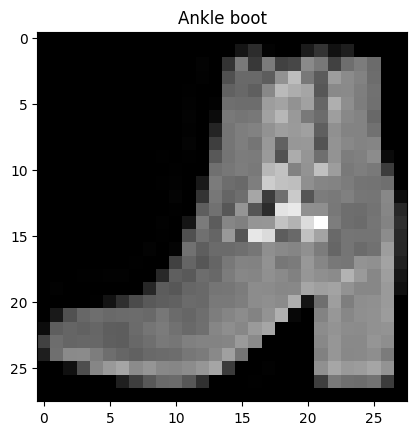

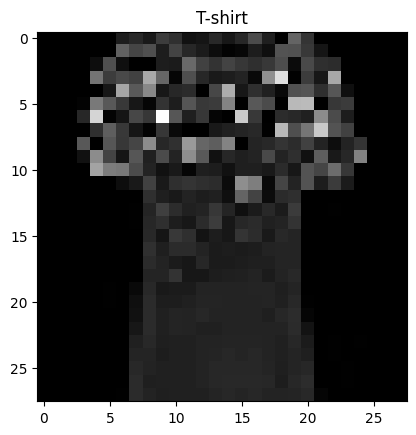

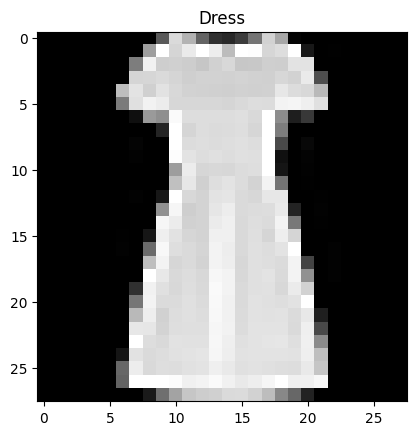

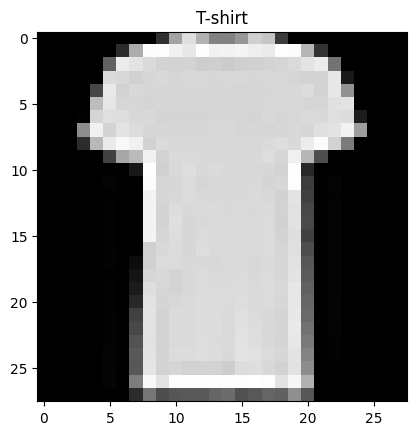

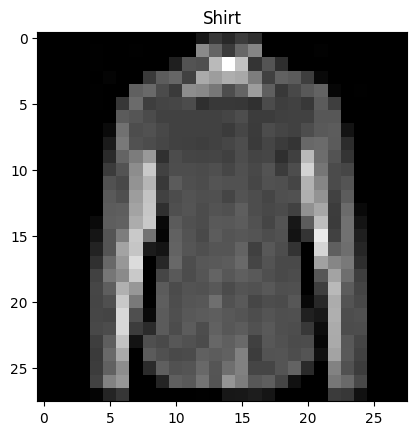

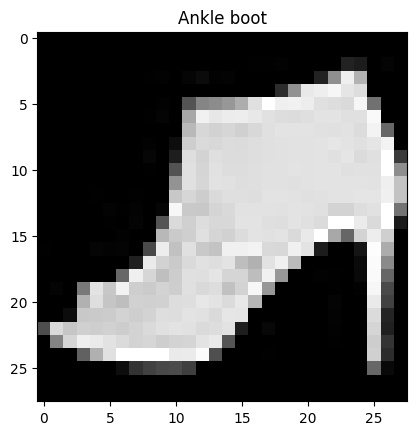

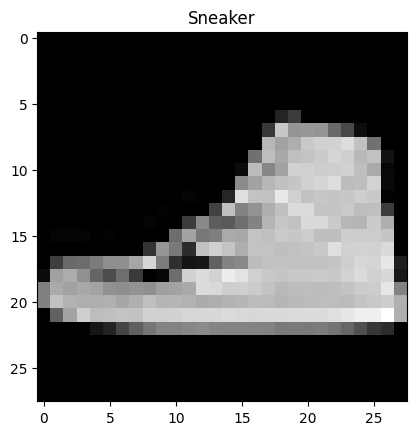

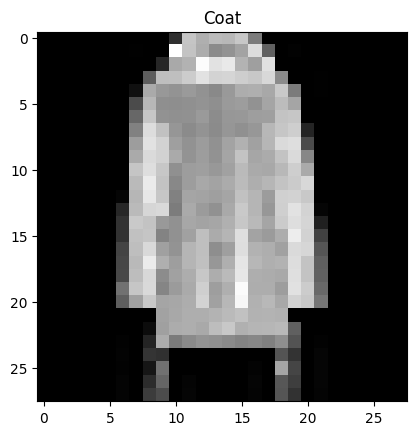

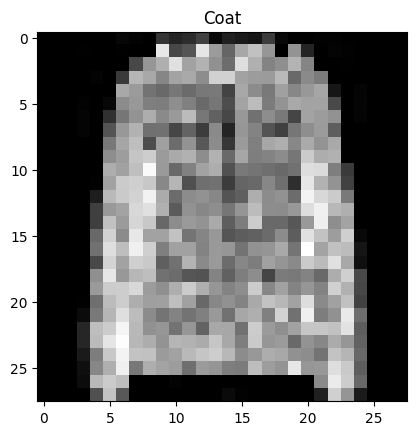

In [ ]:
for temp in random_idx:
    plt.figure()
    plt.imshow(X_train[temp],cmap='gray')
    plt.title(class_names[y_train[temp]])

In [ ]:
X_train = np.reshape(X_train/255,(-1,28,28,1))
X_test = np.reshape(X_test/255,(-1,28,28,1))

from tensorflow.keras.utils import to_categorical

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.3,random_state=100)

In [ ]:
X_train.shape

(42000, 28, 28, 1)

In [ ]:
y_train.shape

(42000, 10)

In [ ]:
X_test.shape

(18000, 28, 28, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
model = Sequential(
                [
                   Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation='relu',input_shape=(28,28,1)),
                   MaxPool2D(pool_size = (2,2) , strides = 2, padding = 'same'),
                   Conv2D(filters = 32, kernel_size=3,padding='same',activation='relu'),
                   MaxPool2D(pool_size = (2,2) , strides = 2, padding = 'same'),
                   Conv2D(filters = 64, kernel_size=3,padding='same',activation='relu'),
                   MaxPool2D(pool_size = (2,2) , strides = 2, padding = 'same'),
                   Flatten(),
                   Dense(64,activation = 'relu'),
                   Dense(10,activation = 'softmax')
                ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [ ]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics = ['acc'])
model.fit(X_train,y_train,epochs=30,batch_size=128)

Epoch 1/30
329/329 [==============================] - 12s 5ms/step - loss: 0.6660 - acc: 0.7569
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4029 - acc: 0.8547
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3455 - acc: 0.8752
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3123 - acc: 0.8882
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2888 - acc: 0.8956
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2706 - acc: 0.9024
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2525 - acc: 0.9099
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2408 - acc: 0.9135
Epoch 9/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2257 - acc: 0.9189
Epoch 10/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2156 - acc: 0.9220
Epoch 11/30
329/329 [===========================

In [ ]:
model.evaluate(X_test,y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.3257 - acc: 0.9099


[0.3256698250770569, 0.9099444150924683]

In [ ]:
model_dense = Sequential()
model_dense.add(Dense(128,activation='relu',input_shape=(784,)))

model_dense.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_conv2d = Sequential()
model_conv2d.add(Conv2D(1000,3,activation='relu',input_shape=(28,28,1)))
model_conv2d.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 1000)      10000     
                                                                 
Total params: 10,000
Trainable params: 10,000
Non-trainable params: 0
_________________________________________________________________
